# 자연어 전처리 실습

> 작성자      
```
* 김성현 (bananaband657@gmail.com)  
1기 멘토
김바다 (qkek983@gmail.com)
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
2기 멘토
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
3기 멘토
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
```
[CC BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/2.0/kr/)


## 전처리를 위한 코퍼스 수집

자연어 전처리 실습을 위해, 먼저 뉴스 기사를 크롤링해보도록 하겠습니다.   
일반적으로 크롤링 코드를 작성하려면 많은 요소들을 고려해야합니다.   
본 실습에서는 url 정보만 입력해주면 텍스트를 추출해주는 [라이브러리](https://github.com/codelucas/newspaper)를 사용하도록 하겠습니다.      

- 뉴스 기사의 제목과 내용을 자동으로 분리해주는 라이브러리

In [1]:
!pip install newspaper3k

     |████████████████████████████████| 211 kB 5.1 MB/s 
     |████████████████████████████████| 7.4 MB 42.7 MB/s 
     |████████████████████████████████| 81 kB 6.9 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=edebad5bf96f13171e9b04dd1cb43c178ee4995b5083907474b6fc68bc5fed1d
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=d4191c4bd0063201352b584f3d222c83e34767f1b891718dbbfa5694febab237
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=5f8a2abb4c7fa24e328429c338343da7bd1ee78b0e98da95e1be5830bb775358
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

- newspaper 라이브러리는 매우 많은 언어에 대한 크롤링을 지원해주며, 아래 명령어로 확인할 수 있습니다.
- 다른 태그에 대한 처리를 해주지 않아도 손쉽게 텍스트 데이터를 얻을 수 있다.

In [2]:
import newspaper
newspaper.languages()

# 한국어도 제공함


Your available languages are:

input code		full name
  en			  English
  vi			  Vietnamese
  ja			  Japanese
  uk			  Ukrainian
  ro			  Romanian
  pt			  Portuguese
  it			  Italian
  nb			  Norwegian (Bokmål)
  et			  Estonian
  fa			  Persian
  ko			  Korean
  bg			  Bulgarian
  he			  Hebrew
  hi			  Hindi
  sv			  Swedish
  no			  Norwegian
  da			  Danish
  tr			  Turkish
  fi			  Finnish
  fr			  French
  sw			  Swahili
  zh			  Chinese
  ar			  Arabic
  de			  German
  sl			  Slovenian
  hu			  Hungarian
  nl			  Dutch
  pl			  Polish
  hr			  Croatian
  es			  Spanish
  mk			  Macedonian
  ru			  Russian
  el			  Greek
  id			  Indonesian
  be			  Belarusian
  sr			  Serbian



뉴스를 바로 크롤링해보도록 하겠습니다.   
일반적으로 뉴스 기사의 경우, 재배포 역시 저작권에 위반되기 때문에, 매우 주의하셔야 합니다.   
본 실습에서는 저작권에서 비교적 자유로운 위키트리 뉴스 데이터를 사용하도록 하겠습니다.   

In [3]:
news_url = "https://www.wikitree.co.kr/articles/252931"
# context = "이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단\n\n\
# 이하 뉴스1\n\n\
# 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.\n\n\
# 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.\n\n\
# 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.\n\n\
# 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일\n\n\
# 대국을 마친 뒤, 이세돌 9단은 \"한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음\"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다."

In [49]:
# Article 클래스 안에 url을 넣고,
# download, parsing 진행

from newspaper import Article

article = Article(news_url, language='ko')
article.download()
article.parse()

print('title:', article.title)
print('context:', article.text)

title: 알파고에 첫승 거두고 미소짓는 이세돌 사진
context: 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단

이하 뉴스1

인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.

13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.

이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.

오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일

대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.


In [8]:
 article.text

'이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단\n\n이하 뉴스1\n\n인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.\n\n13일 서울 광화문 포시즌스 호텔에서 열린 \'구글 딥마인드 챌린지 매치\'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.\n\n이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.\n\n오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일\n\n대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.'

추가적인 전처리 실습을 위해, 뉴스에서 많이 포함되는 예제 텍스트를 임의로 추가하도록 하겠습니다.

In [9]:
context = article.text.split('\n')
context.append("<h1>여기에 태그가 있네요!</h1> <h3>이곳에도 태그가 있구요</h3> html은 <b>태그</b>로 이루어진 문서입니다. 텍스트를 <b>진하게</b> 만들 수도 있고, <u>밑줄</u>을 칠 수도 있습니다. ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘")
context.append("(서울=위키트리) 김성현 기자 (seonghkim@smilegate.com) <저작권자(c) 무단전재-재배포 금지> ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘")
context.append("(사진=위키트리, 무단 전재-재배포 금지) ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘")
context.append("#이세돌 #알파고 #인공지능 #딥러닝 #바둑")


In [10]:
for i, sent in enumerate(context):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 
2 이하 뉴스1
3 
4 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
5 
6 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
7 
8 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.
9 
10 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
11 
12 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
13 <h1>여기에 태그가 있네요!</h1> <h3>이곳에도 태그가 있구요</h3> html은 <b>태그</b>로 이루어진 문서입니다. 텍스트를 <b>진하게</b> 만들 수도 있고, <u>밑줄</u>을 칠 수도 있습니다. ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘
14 (서울=위키트리) 김성현 기자 (seonghkim@smilegate.com) <저작권자(c) 무단전재-재배포 금지> ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘
16 #이세돌 #알파고 #인공지능 #딥러닝 #바둑


HTML 테크가 무분별하게 부착되어 있네요 :-)
먼저 테그부터 제거해보도록 하겠습니다.

In [11]:
import re

In [12]:
# <>가 존재하고 안에 문자가 존재하면 html 태그로 인식해 제거
def remove_html(texts):
    """
    '<'로 시작하고 '>'로 끝나는 애들을 모두 제거
    ``<p>안녕하세요 ㅎㅎ </p>`` -> ``안녕하세요 ㅎㅎ ``

    <h1>title</h1>과 같은 HTML 태그만 제거하려면:
    https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=dndjeo&logNo=221570267970
    """
    preprcessed_text = []
    for text in texts:
        text = re.sub(r"<[^>] + >\s + (?=<)|<[^>]+>", "", text).strip()
        # "<[^>] + >\s + (?=<)"은 </h1>  <h3>처럼 태그 끝과 시작 사이의 문자를 제거함
        # "(?=<)"는 <가 등장하기 전까지 요소들을 의미함, 이것만 단독으로 사용X
        # "<[^>]+>"은 <로 시작해 >가 아닌 문자가 등장하고 >로 끝나는 경우
        if text:
            preprcessed_text.append(text)
    return preprcessed_text

In [13]:
context = remove_html(context)
for i, sent in enumerate(context):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
4 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.
5 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
6 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
7 여기에 태그가 있네요! 이곳에도 태그가 있구요 html은 태그로 이루어진 문서입니다. 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
8 (서울=위키트리) 김성현 기자 (seonghkim@smilegate.com)  ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
9 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
10 #이세돌 #알파고 #인공지능 #딥러닝 #바둑


## 문장 분리

문장 단위로 모델이 학습하도록 유도하기 위해, 문장 분리를 먼저 해주겠습니다. 
-> 문장 단위로 분리하지 않으면 다른 문장인데 다음 sequence로 학습한다. 

한국어 문장분리기 중, 가장 성능이 우수한 것으로 알려진 [kss 라이브러리](https://github.com/hyunwoongko/kss)를 사용하도록 하겠습니다.

rule-based 라이브러리

In [14]:
!pip install kss

     |████████████████████████████████| 42.4 MB 1.1 MB/s 
     |████████████████████████████████| 175 kB 47.2 MB/s 
  Created wheel for kss: filename=kss-3.4.2-py3-none-any.whl size=42448069 sha256=04439518410662f885b375dde1871eb11bf67d467f08c98d6fbc4db1d3089418
  Stored in directory: /root/.cache/pip/wheels/ef/22/aa/6399b60516a067ec97fa6599fb2d472aeb25e3f9ee6dae3224
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=0c47859d4a8a4cd4d226eed1159706b120c8d0003983ee1c3bfa651f050c675c
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built kss emoji


In [16]:
import kss

sents = []

for sent in context:
    sent = sent.strip()
    if sent:
        splited_sent = kss.split_sentences(sent)
        sents.extend(splited_sent)

[Korean Sentence Splitter]: Initializing Pynori...


In [17]:
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 (seonghkim@smilegate.com) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
16 #이세돌 #알파고 #인공지능 #딥러닝 #바둑


눈으로 확인해보니 데이터가 매우 불-편하네요 :-)   
이제 본문에서 제거가 필요한 요소들을 확인해볼 수 있습니다.   

## Normalizing

In [18]:
# 이메일은 개인정보이기 때문에 제거하는게 좋음
# 영어@영어.com 형식인 애들을 삭제
def remove_email(texts):
    """
    이메일을 제거합니다.
    ``홍길동 abc@gmail.com 연락주세요!`` -> ``홍길동  연락주세요!``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [19]:
sents = remove_email(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
16 #이세돌 #알파고 #인공지능 #딥러닝 #바둑


In [20]:
def remove_hashtag(texts):
    """
    해쉬태그(#)를 제거합니다.
    ``대박! #맛집 #JMT`` -> ``대박!  ``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"#\S+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [21]:
sents = remove_hashtag(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘


In [22]:
# 인스타그램 정보, 태깅에 @가 사용되므로 제거
# 개인정보일 수 있음

def remove_user_mention(texts):
    """
    유저에 대한 멘션(@) 태그를 제거합니다.
    ``@홍길동 감사합니다!`` -> `` 감사합니다!``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"@\w+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [23]:
sents = remove_user_mention(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘


In [24]:
# url에 개인정보, 가져오지 않아야되는 정보를 포함할 수 있어 제거
# 자연어가 url에서 학습할 수 있는게 없기 때문에 제거
def remove_url(texts):
    """
    URL을 제거합니다.
    ``주소: www.naver.com`` -> ``주소: ``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"(http|https)?:\/\/\S+\b|www\.(\w+\.)+\S*", "", text).strip()
        text = re.sub(r"pic\.(\w+\.)+\S*", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [25]:
sents = remove_url(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘


In [26]:
# 한국어의 특성 때문에 크롤링하면 이상한 문자가 들어오곤 함
# vocab을 생성하거나 모델에 입력할 때 utf-8로 읽히지 않아 에러를 일으키곤 함


def remove_bad_char(texts):
    """
    문제를 일으킬 수 있는 문자들을 제거합니다.
    """
    bad_chars = {"\u200b": "", "…": " ... ", "\ufeff": ""}
    preprcessed_text = []
    for text in texts:
        for bad_char in bad_chars:
            text = text.replace(bad_char, bad_chars[bad_char])
        text = re.sub(r"[\+á?\xc3\xa1]", "", text)
        if text:
            preprcessed_text.append(text)
    return preprcessed_text

In [27]:
sents = remove_bad_char(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [30]:
def remove_press(texts):
    """
    언론 정보를 제거합니다.
    ``홍길동 기자 (연합뉴스)`` -> ````
    ``(이스탄불=연합뉴스) 하채림 특파원 -> ````
    """
    re_patterns = [
        r"\([^(]*?(뉴스|경제|일보|미디어|데일리|한겨례|타임즈|위키트리)\)",
        r"[가-힣]{0,4} (기자|선임기자|수습기자|특파원|객원기자|논설고문|통신원|연구소장) ",  # 3글자 이름 + 기자
        r"[가-힣]{1,}(뉴스|경제|일보|미디어|데일리|한겨례|타임|위키트리)",  # (... 연합뉴스) ..
        r"\(\s+\)",  # (  )
        r"\(=\s+\)",  # (=  )
        r"\(\s+=\)",  # (  =)
    ]

    preprocessed_text = []
    for text in texts:
        for re_pattern in re_patterns:
            text = re.sub(re_pattern, "", text).strip()
        if text:
            preprocessed_text.append(text)    
    return preprocessed_text

In [29]:
sents = remove_press(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [31]:
def remove_copyright(texts):
    """
    뉴스 내 포함된 저작권 관련 텍스트를 제거합니다.
    ``(사진=저작권자(c) 연합뉴스, 무단 전재-재배포 금지)`` -> ``(사진= 연합뉴스, 무단 전재-재배포 금지)`` TODO 수정할 것
    """
    re_patterns = [
        r"\<저작권자(\(c\)|ⓒ|©|\(Copyright\)|(\(c\))|(\(C\))).+?\>",
        r"저작권자\(c\)|ⓒ|©|(Copyright)|(\(c\))|(\(C\))"
    ]
    preprocessed_text = []
    for text in texts:
        for re_pattern in re_patterns:
            text = re.sub(re_pattern, "", text).strip()
        if text:
            preprocessed_text.append(text)    
    return preprocessed_text

In [32]:
sents = remove_copyright(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [33]:
def remove_photo_info(texts):
    """
    뉴스 내 포함된 이미지에 대한 label을 제거합니다.
    ``(사진= 연합뉴스, 무단 전재-재배포 금지)`` -> ````
    ``(출처=청주시)`` -> ````
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"\(출처 ?= ?.+\) |\(사진 ?= ?.+\) |\(자료 ?= ?.+\)| \(자료사진\) |사진=.+기자 ", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


In [34]:
sents = remove_photo_info(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [35]:
def remove_useless_breacket(texts):
    """
    위키피디아 전처리를 위한 함수입니다.
    괄호 내부에 의미가 없는 정보를 제거합니다.
    아무런 정보를 포함하고 있지 않다면, 괄호를 통째로 제거합니다.
    ``수학(,)`` -> ``수학``
    ``수학(數學,) -> ``수학(數學)``
    """
    bracket_pattern = re.compile(r"\((.*?)\)")
    preprocessed_text = []
    for text in texts:
        modi_text = ""
        text = text.replace("()", "")  # 수학() -> 수학
        brackets = bracket_pattern.search(text)
        if not brackets:
            if text:
                preprocessed_text.append(text)
                continue
        replace_brackets = {}
        # key: 원본 문장에서 고쳐야하는 index, value: 고쳐져야 하는 값
        # e.g. {'2,8': '(數學)','34,37': ''}
        while brackets:
            index_key = str(brackets.start()) + "," + str(brackets.end())
            bracket = text[brackets.start() + 1 : brackets.end() - 1]
            infos = bracket.split(",")
            modi_infos = []
            for info in infos:
                info = info.strip()
                if len(info) > 0:
                    modi_infos.append(info)
            if len(modi_infos) > 0:
                replace_brackets[index_key] = "(" + ", ".join(modi_infos) + ")"
            else:
                replace_brackets[index_key] = ""
            brackets = bracket_pattern.search(text, brackets.start() + 1)
        end_index = 0
        for index_key in replace_brackets.keys():
            start_index = int(index_key.split(",")[0])
            modi_text += text[end_index:start_index]
            modi_text += replace_brackets[index_key]
            end_index = int(index_key.split(",")[1])
        modi_text += text[end_index:]
        modi_text = modi_text.strip()
        if modi_text:
            preprocessed_text.append(modi_text)
    return preprocessed_text

In [36]:
sents = remove_useless_breacket(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린  2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [37]:
!pip install soynlp

     |████████████████████████████████| 416 kB 5.4 MB/s 


In [38]:
from soynlp.normalizer import *  # 일반화

# 반복 횟수를 몇번까지 허용할지
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))

와하하핫


In [39]:
def remove_repeat_char(texts):
    preprocessed_text = []
    for text in texts:
        text = repeat_normalize(text, num_repeats=2).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [40]:
# ㅋㅋㅋㅋㅋㅋㅋ -> ㅋㅋ
sents = remove_repeat_char(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 — 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [41]:
# 기호 일반화(통일)
# 인용구문이 기사별로 다름
def clean_punc(texts):
    punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

    preprocessed_text = []
    for text in texts:
        for p in punct_mapping:
            text = text.replace(p, punct_mapping[p])
        text = text.strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [42]:
sents = clean_punc(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
15 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


In [43]:
# 단어가 삭제된 곳에 연속된 공백이 존재할 수 있음
def remove_repeated_spacing(texts):
    """
    두 개 이상의 연속된 공백을 하나로 치환합니다.
    ``오늘은    날씨가   좋다.`` -> ``오늘은 날씨가 좋다.``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"\s+", " ", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [44]:
sents = remove_repeated_spacing(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
15 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


In [45]:
from collections import OrderedDict
def remove_dup_sent(texts):
    """
    중복된 문장을 제거합니다.
    입력된 순서대로 중복을 제거해 리스트로 만듦
    """
    texts = list(OrderedDict.fromkeys(texts))
    return texts

In [46]:
sents = remove_dup_sent(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


In [47]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-osm_2k18
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-osm_2k18
     |████████████████████████████████| 460.3 MB 8.7 kB/s 
     |████████████████████████████████| 132 kB 47.7 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 4.0 MB 31.6 MB/s 
     |████████████████████████████████| 14.8 MB 35.8 MB/s 
     |████████████████████████████████| 462 kB 40.0 MB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268580 sha256=a298240684c6c8624dd0a4022e78357179c08a9c7ae6bec90fecd51693025be9
  Stored in directory: /tmp/pip-ephem-wheel-cache-4tt0rb54/wheels/9b/93/81/a2a7dc8c66ede5bf30634d20635f32b95eac7ca2ea8844058b
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=3f7b87766d593bfaf356ba8d73307b9cf0b7249c03be1c119240c362a7f0d5f6
  Stored in 

In [48]:
# 띄어쓰기가 하나도 되지 않은 문장이 있을 수 있음
# 기계학습 기반 띄어쓰기를 해주는 모델
# 알립니다 -> 알립니 다
# 옳지 않게 띄어쓰기가 적용되는 경우가 있기 때문에 띄어쓰기가 정말 적은 데이터가 아니면 적용X
# 기사는 기자가 어느정도 문법적으로 작성했기 때문에 적용X

from pykospacing import Spacing
spacing = Spacing()
spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다.")

NotImplementedError: ignored

In [ ]:
def spacing_sent(texts):
    """
    띄어쓰기를 보정합니다.
    """
    preprocessed_text = []
    for text in texts:
        text = spacing(text)
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [ ]:
sents_ = spacing_sent(sents)
for i, sent in enumerate(sents_):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이 세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이 세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제 4국에서 승리했다.
4 이날 대 국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는 데 ㅋㅋ 포토제닉 ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한 판 이겼는데 이렇게까지 축하를 받아 보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기 자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니 다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니 다 ... '


마춤뻡 검사기도 테스트를 해보겠습니다.

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-psct47we
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-psct47we
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=224ba5474282386e96c5c9704e4f35463b2edac65fe5b0b9a8f819504976cc22
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_2mq_74/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker
 
sent = "대체 왜 않돼는지 설명을 해바"
spelled_sent = spell_checker.check(sent)
print(spelled_sent)
checked_sent = spelled_sent.checked 
print(checked_sent)

Checked(result=True, original='대체 왜 않돼는지 설명을 해바', checked='대체 왜 안되는지 설명을 해봐', errors=2, words=OrderedDict([('대체', 0), ('왜', 0), ('안되는지', 1), ('설명을', 0), ('해봐', 1)]), time=0.7569639682769775)
대체 왜 안되는지 설명을 해봐


In [ ]:
# 올바른 텍스트를 모델이 오히려 틀리게 바꾸기도 함
def spell_check_sent(texts):
    """
    맞춤법을 보정합니다.
    """
    preprocessed_text = []
    for text in texts:
        try:
            spelled_sent = spell_checker.check(text)
            checked_sent = spelled_sent.checked 
            if checked_sent:
                preprocessed_text.append(checked_sent)
        except:
            preprocessed_text.append(text)
    return preprocessed_text

In [ ]:
sents_ = spell_check_sent(sents)
for i, sent in enumerate(sents_):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스 1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포 시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 할리우드 영화 만들어지고 포스터 소치요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한 판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있고요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


필터링의 끝판왕!   
형태소 분석 기반 필터링을 테스트하기 위해 한국어 형태소 분석기를 설치합니다.   

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 467 kB/s 
     |████████████████████████████████| 448 kB 66.9 MB/s 


In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.4 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/univers

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()
morphs = mecab.pos("아버지가방에들어가신다.", join=False)
print(morphs)

'''
NN: 명사 관련
J: 조사 관련
V: 동사 관련
'''


[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EF'), ('.', 'SF')]


'\nNN: 명사 관련\nJ: 조사 관련\nV: 동사 관련\n'

## Filtering

In [ ]:
# 명사, 동사, 형용사가 한 문장안에 들어있는 데이터만 사용

def morph_filter(texts):
    """
    명사(NN), 동사(V), 형용사(J)의 포함 여부에 따라 문장 필터링
    """
    NN_TAGS = ["NNG", "NNP", "NNB", "NPf"]
    V_TAGS = ["VV", "VA", "VX", "VCP", "VCN", "XSN", "XSA", "XSV"]
    J_TAGS = ["JKS", "J", "JO", "JK", "JKC", "JKG", "JKB", "JKV", "JKQ", "JX", "JC", "JKI", "JKO", "JKM", "ETM"]

    preprocessed_text = []
    for text in texts:
        morphs = mecab.pos(text, join=False)

        nn_flag = False
        v_flag = False
        j_flag = False
        for morph in morphs:
            pos_tags = morph[1].split("+")
            for pos_tag in pos_tags:
                if not nn_flag and pos_tag in NN_TAGS:
                    nn_flag = True
                if not v_flag and pos_tag in V_TAGS:
                    v_flag = True
                if not j_flag and pos_tag in J_TAGS:
                    j_flag = True
            if nn_flag and v_flag and j_flag:
                preprocessed_text.append(text)
                break
    return preprocessed_text

In [ ]:
sents = morph_filter(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
2 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
3 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
4 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
5 이 사진은 SNS에서 화제를 모았다.
6 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
7 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
8 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
9 여기에 태그가 있네요!
10 이곳에도 태그가 있구요
11 html은 태그로 이루어진 문서입니다.
12 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
13 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


In [ ]:
sents

NameError: ignored

In [ ]:
def excluded_word_filter(excluded_words, texts):
    """
    특정 단어를 포함하는 문장 필터링
    """
    preprocessed_text = []
    for text in texts:
        include_flag = False
        for word in excluded_words:
            if word in text:
                include_flag = True
                break
        if not include_flag:
            preprocessed_text.append(text)
    return preprocessed_text

In [ ]:
excluded_words = ["이하 뉴스1", "이 줄은 실제 뉴스", "태그"]

In [ ]:
sents = excluded_word_filter(excluded_words, sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
1 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
2 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
3 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
4 이 사진은 SNS에서 화제를 모았다.
5 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
6 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
7 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.


In [ ]:
def remove_stopwords(sents):
    #  큰 의미가 없는 불용어 정의
    stopwords = ['소취요', '-', '조드윅', '포스터', '앓는', '서린']
    preprocessed_text = []
    for sent in sents:
        sent = [w for w in sent.split(' ') if w not in stopwords]# 불용어 제거
        preprocessed_text.append(' '.join(sent))
    return preprocessed_text

In [ ]:
sents_ = remove_stopwords(sents)
for i, sent in enumerate(sents_):
    print(i, sent)

0 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
1 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
2 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
3 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
4 이 사진은 SNS에서 화제를 모았다.
5 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 2016년 3월 13일
6 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
7 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.


In [ ]:
def min_max_filter(min_len, max_len, texts):
    """
    문장을 최대, 최소 길이로 필터링합니다.
    """
    preprocessed_text = []
    for text in texts:
        if min_len < len(text) and len(text) < max_len:
            preprocessed_text.append(text)
    return preprocessed_text

최종 결과입니다! :-)   
처음에 비하면 많이 이뻐졌죠?   

In [ ]:
sents_ = min_max_filter(min_len=5, max_len=70, texts=sents)
for i, sent in enumerate(sents_):
    print(i, sent)

0 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
1 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
2 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
3 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
4 이 사진은 SNS에서 화제를 모았다.
5 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
6 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.


## 유니코드 기반으로 filtering

1. 유니코드란?
> 유니코드(Unicode)는 전 세계의 모든 문자를 컴퓨터에서 일관되게 표현하고 다룰 수 있도록 설계된 산업 표준이며, 유니코드 협회(Unicode Consortium)가 제정한다. 또한 이 표준에는 ISO 10646 문자 집합, 문자 인코딩, 문자 정보 데이터베이스, 문자들을 다루기 위한 알고리즘 등을 포함하고 있다. - 위키피디아 -

* 한국인들은 주로 영어, 한국어, 숫자들에 익숙해 있습니다. 그런데 갑자기 러시아어, 아랍어, 불어와 같은 언어들을 처리해야 한다면?!
* 이런 고민을 유니코드를 사용하면 해결할 수 있습니다!
* 이번 장에서는 간단하게 유니코드를 python 프로그래밍에서 사용하는 방법을 배우도록 하겠습니다.

2. 유니코드 표현
* 유니코드는 16진수로 표현되어 있습니다. 간단한 예제를 통해 알아보겠습니다.
* 다양한 언어와 문자에 대한 유니코드는 https://jrgraphix.net/r/Unicode/0020-007F 이 사이트에서 쉽게 확인 가능합니다.
* 유니코드에는 순서가 있어 특정 언어에 해당하는 유니코드 범위가 있다. 
* but, 일부 언어는 같은 유니코드를 사용해 확인한 후 사용해야 한다.

In [ ]:
sentence = 'hello world'

print('* 원본 문장')
print(sentence)

print('\n* 10진수로 표현된 유니코드')
for w in sentence:
  print(ord(w), end=' ') # 문자 -> 10진수 변환

print('\n\n* 16진수로 표현된 유니코드')
for w in sentence:
  print(hex(ord(w)), end=' ') # 문자 -> 16진수 변환

* 원본 문장
hello world

* 10진수로 표현된 유니코드
104 101 108 108 111 32 119 111 114 108 100 

* 16진수로 표현된 유니코드
0x68 0x65 0x6c 0x6c 0x6f 0x20 0x77 0x6f 0x72 0x6c 0x64 

In [ ]:
range_s = int('0370',16) # 그리스 문자 유니코드 범위
range_e = int('03FF',16) # 16진수 -> 10진수 변환

for i in range(range_s, range_e + 1): # 
  print(chr(i), end=' ')

Ͱ ͱ Ͳ ͳ ʹ ͵ Ͷ ͷ ͸ ͹ ͺ ͻ ͼ ͽ ; Ϳ ΀ ΁ ΂ ΃ ΄ ΅ Ά · Έ Ή Ί ΋ Ό ΍ Ύ Ώ ΐ Α Β Γ Δ Ε Ζ Η Θ Ι Κ Λ Μ Ν Ξ Ο Π Ρ ΢ Σ Τ Υ Φ Χ Ψ Ω Ϊ Ϋ ά έ ή ί ΰ α β γ δ ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω ϊ ϋ ό ύ ώ Ϗ ϐ ϑ ϒ ϓ ϔ ϕ ϖ ϗ Ϙ ϙ Ϛ ϛ Ϝ ϝ Ϟ ϟ Ϡ ϡ Ϣ ϣ Ϥ ϥ Ϧ ϧ Ϩ ϩ Ϫ ϫ Ϭ ϭ Ϯ ϯ ϰ ϱ ϲ ϳ ϴ ϵ ϶ Ϸ ϸ Ϲ Ϻ ϻ ϼ Ͻ Ͼ Ͽ 

* 유니코드의 범위를 안다면 쉽게, 출력도 가능하다.
* 15번째 문자를 보면 세미콜론(;)과 유사하기로 악명을 떨친 그리스어 ; 가 있다.
* 유니코드를 이용한다면 쉽게 그리스어 ; 검출도 가능하다!

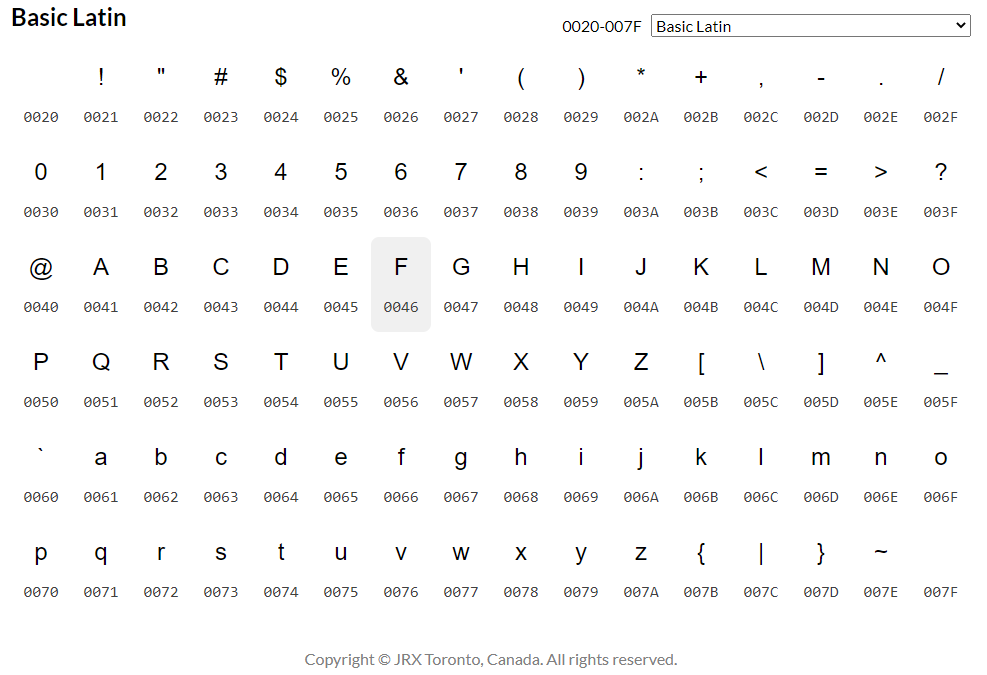

* hello world에 해당하는 유니코드들이 올바르게 표시 되었음을 확인할 수 있습니다.
* 위와 같이 해당하는 언어들의 유니코드 범위를 안다면, 쉽게 다양한 언어들을 구별 할 수 있습니다.

3. 유니코드 활용
* 이번 장에서는 10진수, 16진수, ord()함수를 이용해 다양한 언어로 구성된 hello world 문장 속에서 특정 언어를 제거해 보도록 하겠습니다.

In [ ]:
def remove_language(range_s, range_e, sentence):
    a = int(range_s, 16) # 16진수 -> 10진수 변환
    b = int(range_e, 16)
    return_sentence = ''
    for i, w in enumerate(sentence):
        if a<= ord(w) and ord(w) <= b:  # 음절 단위로 사전에 정의한 유니코드 범위 내에 존재하는가
            continue
        return_sentence+=w
    return return_sentence

In [ ]:
sentence = 'hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới Привет, мир'
# 영어 한국어 아랍어 독일어 베트남어 러시아어
# 구글번역기 이용
print(sentence)

hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới Привет, мир


In [ ]:
print(remove_language('0600','06FF',sentence)) # 아랍어 제거, 아랍어의 유니코드 범위 0600 ~ 06FF

hello world 안녕하세요 세계    Hallo Welt Chào thế giới Привет, мир


In [ ]:
print(remove_language('0400','04FF',sentence)) # 러시아어 제거, 러시아 키릴 문자의 유니코드 범위 0400 ~ 04FF

hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới , 


* 영어를 제거하려면 어떻게 해야할까?
* 위에서 소개한 유니코드 사이트에서 Basic Latin 0020 ~ 007F 범위에 대소문자 알파벳이 있음을 알 수 있다. 

In [ ]:
print(remove_language('0020','007F',sentence)) # 알파벳 제거, 알파벳의 유니코드 범위 0020 ~ 007F

안녕하세요세계مرحبابالعالمàếớПриветмир


* 주의해야할 점을 눈치 채셨나요?
* 먼저 영어, 독일어, 베트남어 일부는 같은 유니코드 체계를 이용해 표현됩니다.
* 두번째로, 유니코드 범위에 공백을 표현하는 유니코드가 속해 있을 수 있어, 원하지 않게 띄어쓰기를 제거하게 됩니다.
* 이런 점들을 고려해, 독립된 유니코드를 사용하는 언어인지, 유니코드에서 띄어쓰기 혹은 특수문자들에 대해서도 원하는 목적을 위해 적절히 예외처리를 해주셔야합니다.